In [1]:
from Transformer import TransformerController
from Utils.SaveUtils import load_parameters
from Parameters import TrainingParameters
from Utils.PrintUtils import print_big
from Utils.DataUtils import *
import tensorflow as tf
import numpy as np

In [2]:
folder_path = "./SavedModels/%s" % (
    "0.7859_BPI2012WithResource_TransformerActivityOnly_2021-06-23 03:25:19.491504" # 1 Epoch only
)

In [3]:
### Initialise controllers
parameters_json = load_parameters(folder_path=folder_path)
parameters = TrainingParameters(**parameters_json)
tf.random.set_seed(parameters.dataset_split_seed)
np.random.seed(parameters.dataset_split_seed)
parameters.load_model_folder_path = folder_path
trainer = TransformerController(parameters = parameters)
trainer.show_model_info()


| Running on /job:localhost/replica:0/task:0/device:CPU:0  

| Preprocessed data loaded successfully: ./datasets/preprocessed/BPI_Challenge_2012_with_resource/AOW 

| Model loaded successfully from: ./SavedModels/0.7859_BPI2012WithResource_TransformerActivityOnly_2021-06-23 03:25:19.491504  
Model: "predicting_next_transformer_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
predict_next_encoder (Predic multiple                  35008     
_________________________________________________________________
dense_24 (Dense)             multiple                  858       
Total params: 35,866
Trainable params: 35,866
Non-trainable params: 0
_________________________________________________________________

| Loaded model has been trained for [8200] steps, [50] epochs 


In [4]:
########### Get example data from trainer ###########
ordered_test_idx = (list(trainer.test_dataset.unbatch().as_numpy_iterator()))
ordered_test_idx.sort()
print_big(len(ordered_test_idx), "Test set length")


====================Test set length====================
| 1309 


In [5]:
########## Get longest delcined trace for testing ##########
declined_df = get_trace_with_id(trainer.dataset.df.iloc[ordered_test_idx], trainer.model.vocab.vocab_to_index('A_DECLINED_COMPLETE'))
longest_declined_trace_row = get_longest_trace_row(declined_df)
longest_declined_trace_row

,trace,trace_vocab,caseid,amount,resource,resource_orig
8464,"[2, 12, 9, 10, 20, 22, 3, 17, 8, 15, 19, 22, 1...","[<SOS>, A_SUBMITTED_COMPLETE, A_PARTLYSUBMITTE...",200028,5800.0,"[70, 53, 53, 15, 15, 48, 37, 37, 37, 37, 37, 3...","[<SOS>, 112, 112, 10863, 10863, 11169, 11003, ..."


In [6]:
_, example_activities, _, example_resources, example_amount, _ = trainer.dataset.collate_fn([longest_declined_trace_row.index[0]])

In [7]:
 print("========================================Trace========================================")
 print(trainer.model.vocab.list_of_index_to_vocab_2d(example_activities))

========================================Trace========================================
[['<SOS>', 'A_SUBMITTED_COMPLETE', 'A_PARTLYSUBMITTED_COMPLETE', 'A_PREACCEPTED_COMPLETE', 'W_Afhandelen leads_COMPLETE', 'W_Completeren aanvraag_COMPLETE', 'A_ACCEPTED_COMPLETE', 'O_SELECTED_COMPLETE', 'A_FINALIZED_COMPLETE', 'O_CREATED_COMPLETE', 'O_SENT_COMPLETE', 'W_Completeren aanvraag_COMPLETE', 'O_SELECTED_COMPLETE', 'O_CANCELLED_COMPLETE', 'O_CREATED_COMPLETE', 'O_SENT_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'O_CANCELLED_COMPLETE', 'O_SELECTED_COMPLETE', 'O_CREATED_COMPLETE', 'O_SENT_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'O_SENT_BACK_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'W_Valideren aanvraag_COMPLETE', 'W_Nabellen incomplete dossiers_COMPLETE', 'W_Nabellen incomplete dossiers_COMPLETE', 'W_Nabellen incomplete dossiers_COMPLETE', 'W_Nabellen incomplete do

In [8]:
example_idx_activities, example_idx_resources = remove_trail_steps(example_activities, example_resources, 45)
example_vocab_activities = trainer.model.vocab.list_of_index_to_vocab_2d(example_idx_activities)[0]
print("========================================Trace after substraction========================================")
print(example_vocab_activities)

========================================Trace after substraction========================================
['<SOS>', 'A_SUBMITTED_COMPLETE', 'A_PARTLYSUBMITTED_COMPLETE', 'A_PREACCEPTED_COMPLETE', 'W_Afhandelen leads_COMPLETE', 'W_Completeren aanvraag_COMPLETE', 'A_ACCEPTED_COMPLETE', 'O_SELECTED_COMPLETE', 'A_FINALIZED_COMPLETE']


In [9]:
##### Prepare input
example_activities_input = tf.constant(example_idx_activities, dtype=tf.int64)
example_resources_input = tf.constant(example_idx_resources, dtype=tf.int64)
example_amount_input = tf.constant(example_amount)

In [10]:
### Prediction
predicted, attentions_in_time_series, all_predicted_tokens = trainer.predict_next(example_activities_input, eos_id= trainer.model.vocab.vocab_to_index("<EOS>"))

In [11]:
print(all_predicted_tokens)

['<SOS>', 'A_SUBMITTED_COMPLETE', 'A_PARTLYSUBMITTED_COMPLETE', 'A_PREACCEPTED_COMPLETE', 'W_Afhandelen leads_COMPLETE', 'W_Completeren aanvraag_COMPLETE', 'A_ACCEPTED_COMPLETE', 'O_SELECTED_COMPLETE', 'A_FINALIZED_COMPLETE', 'O_CREATED_COMPLETE', 'O_SENT_COMPLETE', 'W_Completeren aanvraag_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'W_Nabellen offertes_COMPLETE', 'O_CANCELLED_COMPLETE', 'A_CANCELLED_COMPLETE', '<EOS>']


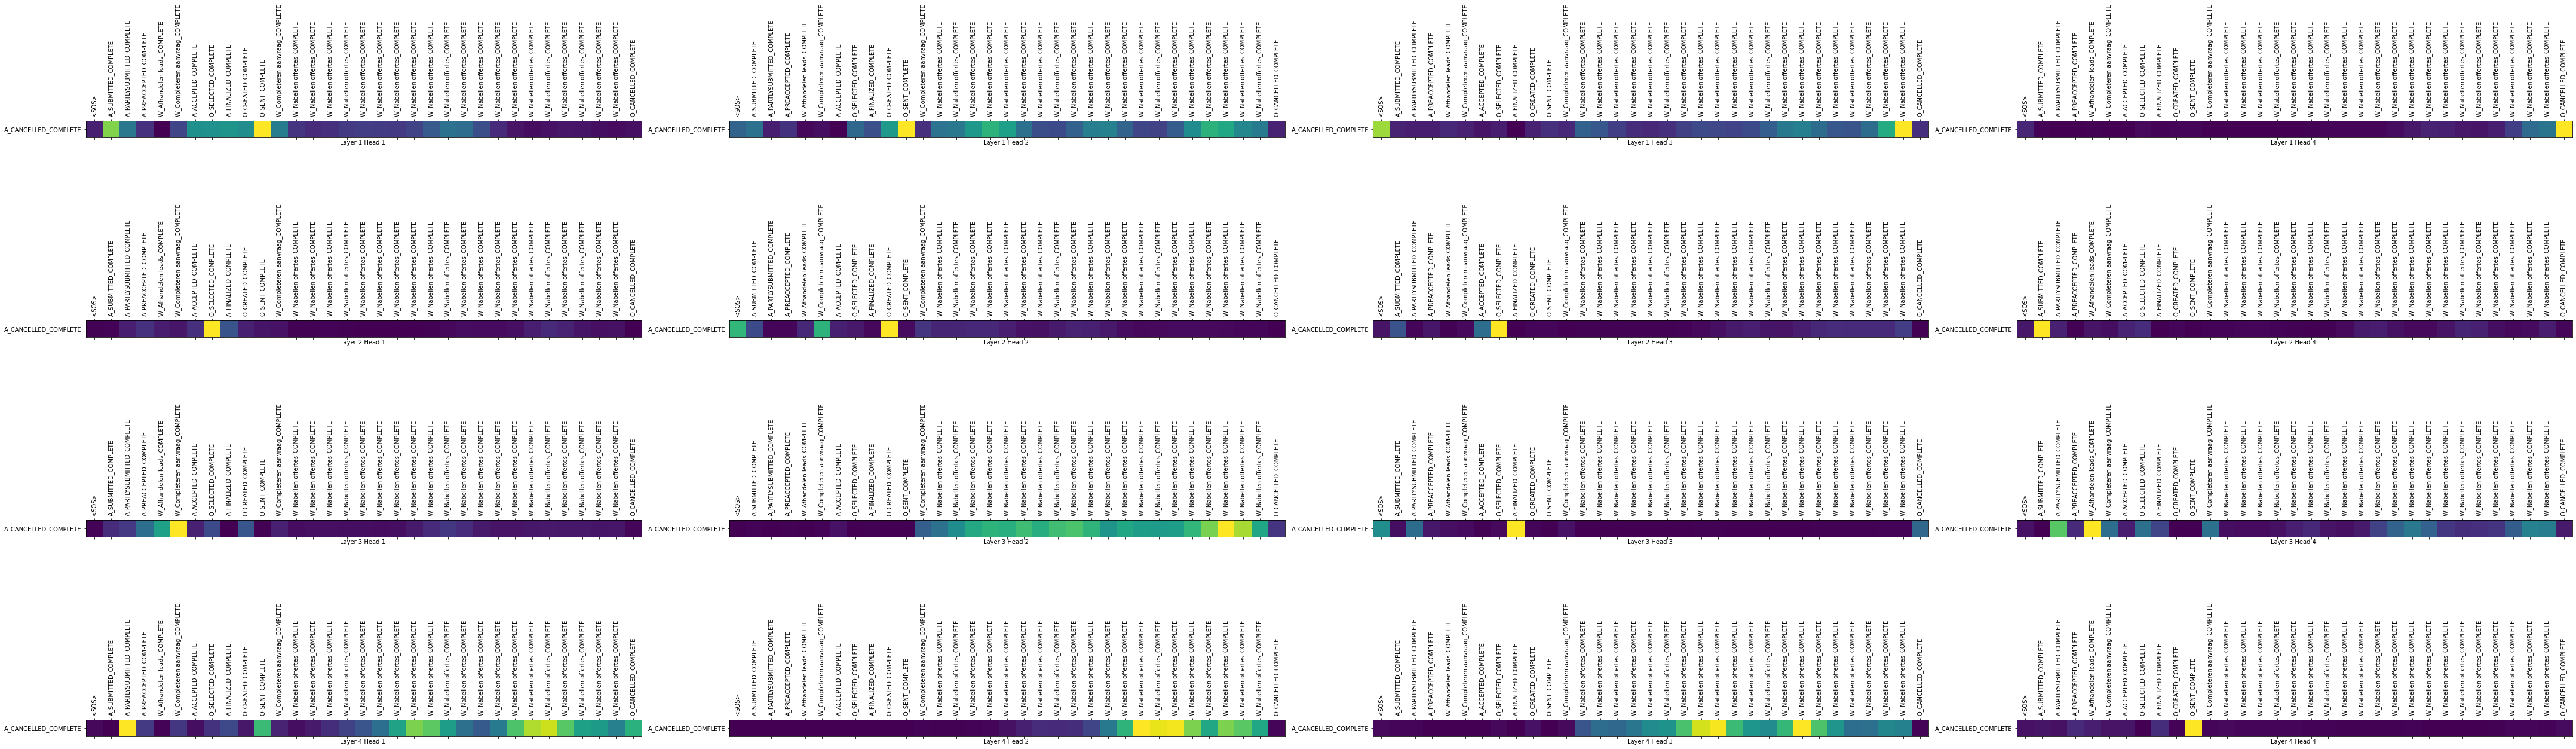

In [12]:
#### Click the image to see detail.
trainer.plot_step_attention_weight(24, all_predicted_tokens, attentions_in_time_series, example_activities_input.shape[1])

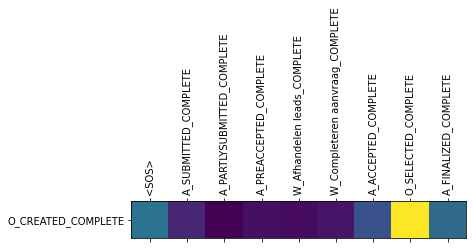

In [13]:
trainer.plot_stop_mean_attention_weight(0, all_predicted_tokens, attentions_in_time_series, example_activities_input.shape[1])

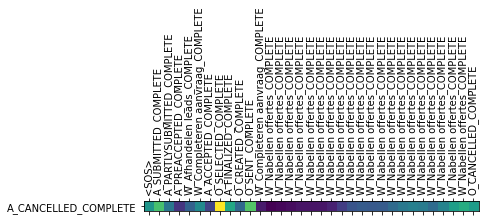

In [14]:
trainer.plot_stop_mean_attention_weight(24, all_predicted_tokens, attentions_in_time_series, example_activities_input.shape[1])